In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon

# Early stopping - Permutation Tests

**Why**: Improve computation time by having less permutation tests (on average) with same performance.

**Idea**: Minimize the number of actions needed to reach a conclusive answer, if initial results are very convincing

**Procedure for permutation tests**:
1. Choose number of tests and desired confidence threshold.
2. After every test, check if the test would be conclusive even if all remaining tests showed opposite effect
3. If yes, do not perform remaining tests.

**Improvement 1**: If check time is comparable to test time, then perform checks at certain intervals, less frequent than after every test.

**Improvement 2**: If tests are very expensive, can do smarter but more involved checks
* Observation: Having all remaining tests show opposite effect is permutationally-unlikely.
* Have two p-values: one for final test, and one for permutational likelihood of the outcome distribution. Based on Bonferroni, set both to $p/2$.
* Select highest fraction for which we would fail to reject $p/2$, estimate probability of seeing the observed fraction of positive tests within the already performed tests. If that probability is below $p/2$, the conclusion can already be made.

# Early stopping - Wilcoxon signed-rank

## Attempt 1

Have part of dataset as very confident and part of very indecisive. See what p-values we get based on ratio of good vs bad

**Conclusions:**
* For both rejection and abandon of rejection of H0, there exist adversarial approach to choosing the remaining data even for most extreme cases of both. A strong result can be rendered completely insignificant, at least until measured data is 50% of total data, so for less extreme realistic situations the cutoff threshold may be even further away.
* At this level of approximation there is very little to be gained from early stopping

# Attempt 2 [TODO]

**Criticism of Attempt 1**: The adversarial attacks answer the question on whether we can make conclusions based on seeing part of the data, when the unseen part is allowed to be anything at all. Loosely, adversarial unseen data may be unlikely given the data that has already been observed. More precisely, we need a test for i.i.d of the whole dataset, and only allow such adversarial datasets, for which the iid test is not significantly violated.

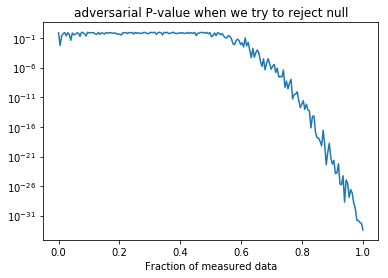

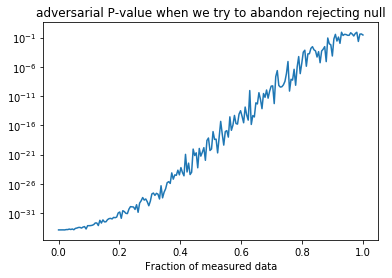

In [29]:
#############################
# Attempt at early rejection
#############################
n = 200
pVal = np.zeros(n)
for nGood in range(n):
    dataGood = np.random.uniform(500, 600, nGood)
    dataAdversary = np.random.uniform(-600, -500, np.min([nGood, n-nGood]))
    data = np.hstack([dataGood, dataAdversary])
    
    if len(data) < n:
        data = np.hstack([data, np.random.normal(0, 1, n-len(data))])
    
    pVal[nGood] = wilcoxon(data)[1]

plt.figure()
plt.title("adversarial P-value when we try to reject null")
plt.xlabel("Fraction of measured data")
plt.semilogy(np.linspace(0,1,n), pVal)
plt.show()

#############################
# Attempt at early abandon
#############################
n = 200
pVal = np.zeros(n)
for nBad in range(n):
    data1 = np.random.normal(0, 1, nBad)
    data2 = np.random.uniform(500, 600, n-nBad)
    data = np.hstack([data1, data2])
    pVal[nBad] = wilcoxon(data)[1]
    
plt.figure()
plt.title("adversarial P-value when we try to abandon rejecting null")
plt.xlabel("Fraction of measured data")
plt.semilogy(np.linspace(0,1,n), pVal)
plt.show()